# やること

- mlflowサーバでモデル構築する → じゃないとモデル自体は保存できない（ローカルでやるなら大丈夫）

## import

In [1]:
import mlflow
import os

## MLprojectを実行する

In [2]:
os.getcwd()

'/app/notebooks'

In [3]:
project_path = os.path.join(os.sep, 'app', 'ops')

In [9]:
# mlflow serverのurlを指定する → 指定しない場合はカレントディレクトリにログが保存される
remote_server_uri = 'http://host.docker.internal:5000/'
mlflow.set_tracking_uri(remote_server_uri)

In [10]:
# 対象のexperimentを指定する
# experiment is 何？ → モデルのリポジトリ名的なものと思ってもらえれば
mlflow.set_experiment('mnist')

2019/11/30 04:51:35 ERROR mlflow.utils.rest_utils: API request to http://host.docker.internal:5000/api/2.0/mlflow/experiments/create failed with code 500 != 200, retrying up to 2 more times. API response body: <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>



INFO: 'mnist' does not exist. Creating a new experiment


2019/11/30 04:51:38 ERROR mlflow.utils.rest_utils: API request to http://host.docker.internal:5000/api/2.0/mlflow/experiments/create failed with code 500 != 200, retrying up to 1 more times. API response body: <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>

2019/11/30 04:51:41 ERROR mlflow.utils.rest_utils: API request to http://host.docker.internal:5000/api/2.0/mlflow/experiments/create failed with code 500 != 200, retrying up to 0 more times. API response body: <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>

MlflowException: API request to http://host.docker.internal:5000/api/2.0/mlflow/experiments/create failed to return code 200 after 3 tries

In [ ]:
result = mlflow.projects.run(
    uri=project_path,
    entry_point='job',  # entry_pointの名前
    experiment_id=target_experiment.experiment_id,
    synchronous=False,  # jobの実行を別プロセスに任せるか
    use_conda=False,  # ??? 多分condaのmetaファイルを読み込んでanacondaを適応するかどうか
    backend='local',
    parameters={'s3_file_path': ''}  # MLprojectに定義しているパラメータで指定する
)

## 保存されているか、プログラマブルに確認

In [27]:
# client側で取得
client = mlflow.tracking.MlflowClient(tracking_uri=remote_server_uri)

# experiment_nameでexperimentを検索
target_experiment = client.get_experiment_by_name(experiment_name)
target_experiment

<Experiment: artifact_location='./mlruns/0', experiment_id='0', lifecycle_stage='active', name='mnist', tags={}>

In [24]:
run_ids = client.search_runs([target_experiment.experiment_id])

In [25]:
run_ids[0]

<Run: data=<RunData: metrics={'accuracy': 0.8481481481481481,
 'f1_score': 0.8481481481481481,
 'precision': 0.8481481481481481,
 'recall': 0.8481481481481481}, params={'bootstrap': 'True',
 'class_weight': 'None',
 'criterion': 'gini',
 'max_depth': '3',
 'max_features': 'auto',
 'max_leaf_nodes': 'None',
 'min_impurity_decrease': '0.0',
 'min_impurity_split': 'None',
 'min_samples_leaf': '1',
 'min_samples_split': '2',
 'min_weight_fraction_leaf': '0.0',
 'n_estimators': '100',
 'n_jobs': 'None',
 'oob_score': 'False',
 'random_state': '71',
 's3_file_path': "''",
 'verbose': '0',
 'warm_start': 'False'}, tags={'example': '10',
 'example2': 'test',
 'mlflow.gitRepoURL': 'https://github.com/PyDataOkinawa/meetup040',
 'mlflow.project.entryPoint': 'job',
 'mlflow.source.git.commit': 'd40fff1d244093536c6cb0f6a37dfd55d6a18042',
 'mlflow.source.git.repoURL': 'https://github.com/PyDataOkinawa/meetup040',
 'mlflow.source.name': 'file:///app#ops',
 'mlflow.source.type': 'PROJECT',
 'mlflow.us

In [26]:
len(run_ids)

19

## あのときのモデルを取り出して再利用

### run_idを指定して取り出す

run_idとは？？？ → 赤い四角のこと

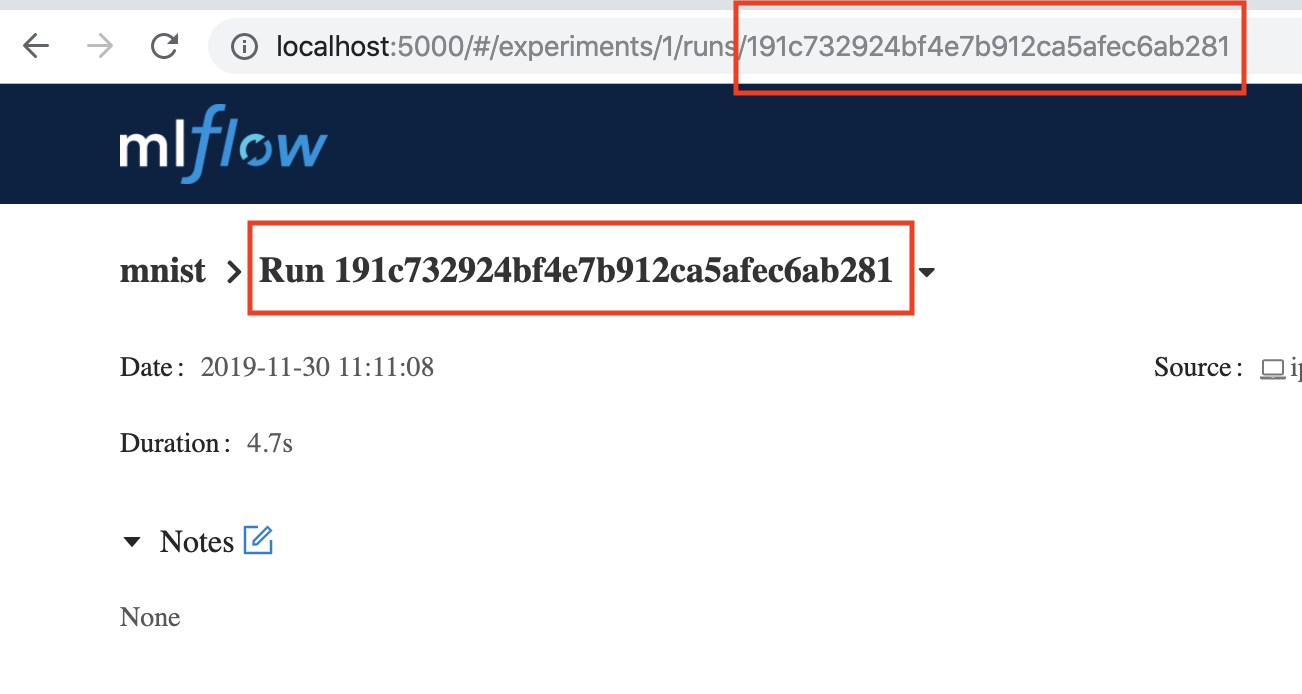

In [29]:
run_id = '8cf9fad27c7e4d02b4478421573bd1df'
model_file_path = client.download_artifacts(run_id=run_id, path='tmp.obj')

OSError: No such file or directory: './mlruns/0/8cf9fad27c7e4d02b4478421573bd1df/artifacts/tmp.obj'

In [92]:
model_file_path

'/app/notebooks/mlruns/1/191c732924bf4e7b912ca5afec6ab281/artifacts/tmp.obj'

In [97]:
with open(model_file_path, mode='rb') as f:
    model = pickle.load(f)

EOFError: Ran out of input

# チャレンジ

### 最新のモデルを取り出す

### tagで検索して取り出す

### いろんな条件で取り出す